# DS Nanodegree - Project 1

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import HowToBreakIntoTheField as t
%matplotlib inline

df = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# I Business Understanding

1. What's the share and background of women in tech?

2. How average salary compares for Man and Woman based on formal education?

3. Does your Major affects your salary?



# II. Data Understanding


In [181]:
print(f' dataset is composed of {df.shape[0]} rows and {df.shape[1]} columns.')

 dataset is composed of 51392 rows and 154 columns.


In [182]:
# Check for numerical variables nulls
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [183]:
# Check for categorical variables nulls
#Columns with null data more than 50%, 75% and 90% of rows:
null_50_col = df.columns[(df.dtypes == "object" ) & ((df.isnull().sum() / df.shape[0]) >= 0.50)]
null_75_col = df.columns[(df.dtypes == "object" ) & ((df.isnull().sum() / df.shape[0]) >= 0.75)]
null_90_col = df.columns[(df.dtypes == "object" ) & ((df.isnull().sum() / df.shape[0]) >= 0.90)]



In [184]:
null_90_col

Index(['YearsCodedJobPast', 'MobileDeveloperType', 'NonDeveloperType',
       'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years',
       'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode',
       'ExCoderActive', 'TimeAfterBootcamp'],
      dtype='object')

In [185]:

#Check for null values on relevant columns as per business understanding:
print(df["Race"].isnull().mean())

print(df["Gender"].isnull().mean())

#Checking for null values on salaries
print(df["Salary"].isnull().mean())

#Checking for null values on salaries and Gender
print((df["Salary"].isnull() | df["Gender"].isnull()).mean())

# 70% of the dataframe for salaries is null.
# 30 % of the dataset for Race and Gender is null
# 77% of the datasrt is null for salary or Gender

0.3572345890410959
0.3180456102117061
0.7491632938978829
0.7721629825653799


# III. Data Preparation


In [186]:
#Import functions for data handling and preparation
from utils import *

#defining some main variables to study
possible_cousin= ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

#List possible educations 
possible_education = list(df["FormalEducation"].value_counts().index)

# List all possible genders 
possible_gender = ["Male","Female","Other",'Gender non-conforming','Transgender']

#List all possible races
possible_races = list(df["Race"].value_counts().head(8).index)


#Drop Gender nulls
df = df.dropna(subset=["Gender"],axis=0)

#Create new simplier variables for gender and high education from categorical variables.

#Simplify gender column into a less categories for those who selected more than 1 gender.> Male , Female and Other
df['gender_clean'] = df["Gender"].apply(gender_split)

# Categorize education based by applying higher_ed funcion.(1,0)
df["high_education"] = df["FormalEducation"].apply(higher_ed)

#Prepare race column, simplify race into others when is nont only one race.
df['race_simpler'] = df["Race"].apply(race_split)

#Return 1 if race is white, 0 if race is not white.
df["white_race"] = df["race_simpler"].apply(white_race_bool)

# IV: Evaluate the Results

## 1 What's the share and background of women in tech?

0.0 % of the dataframe for Gender is null


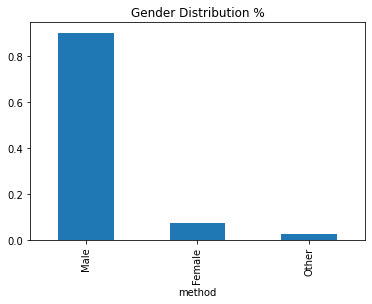

,count
method,
Male,0.901332
Female,0.074186
Other,0.024481


In [187]:
#Check for nulls (already dropped)
print(f'{df["Gender"].isnull().mean()} % of the dataframe for Gender is null')

# Since I want to understand how the tech professionals are distributed I decided to drop Gender rows, since 30% of them are null
df_gender = df.dropna(subset=["Gender"],axis=0)

#split genders in different DFs
gen_male = df_gender[df_gender["gender_clean"] == "Male"]
gen_female = df_gender[df_gender["gender_clean"] == "Female"]
gen_other = df_gender[df_gender["gender_clean"] == "Other"]

#Count total unique genders
clean_and_plot(df_gender,"gender_clean",possible_gender ,'Gender Distribution %', plot=True)

Man represents the vast majority of surveys, 90%

In [188]:
#Here I decided to use a pivot tabel instead of the clean_plot function as it's easy and simplier to code

gender_education_pivot_df = df_gender.pivot_table(index = "FormalEducation",columns = "gender_clean",values= "Respondent", aggfunc="count")
gender_education_pivot_df.rename(columns={"Male":"male_pct","Female":"female_pct","Other":"other_pct"}, inplace=True)

gender_education_pivot_df = gender_education_pivot_df / df_gender.groupby("gender_clean").count()[["Respondent"]].T.values.tolist()[0]

gender_education_pivot_df['Diff_Ed_Vals_male_female'] = gender_education_pivot_df['male_pct'] - gender_education_pivot_df['female_pct']
gender_education_pivot_df['Diff_Ed_Vals_male_other'] = gender_education_pivot_df['male_pct'] - gender_education_pivot_df['other_pct']
gender_education_pivot_df['Diff_Ed_Vals_female_other'] = gender_education_pivot_df['female_pct'] - gender_education_pivot_df['other_pct']

gender_education_pivot_df.style.bar(subset=['Diff_Ed_Vals_male_female'], align='mid', color=['#d65f5f', '#5fba7d'])

gender_clean,female_pct,male_pct,other_pct,Diff_Ed_Vals_male_female,Diff_Ed_Vals_male_other,Diff_Ed_Vals_female_other
FormalEducation,,,,,,
Bachelor's degree,0.508077,0.424262,0.347319,-0.083815,0.076942,0.160758
Doctoral degree,0.037692,0.026148,0.026807,-0.011544,-0.000658,0.010886
I never completed any formal education,0.000769,0.005793,0.016317,0.005024,-0.010524,-0.015548
I prefer not to answer,0.007308,0.013074,0.027972,0.005766,-0.014898,-0.020664
Master's degree,0.265385,0.222071,0.143357,-0.043314,0.078714,0.122028
Primary/elementary school,0.001538,0.017411,0.044289,0.015873,-0.026878,-0.042751
Professional degree,0.011923,0.012314,0.003497,0.000391,0.008818,0.008427
Secondary school,0.055000,0.110292,0.166667,0.055292,-0.056375,-0.111667
Some college/university study without earning a bachelor's degree,0.112308,0.168635,0.223776,0.056327,-0.055142,-0.111469


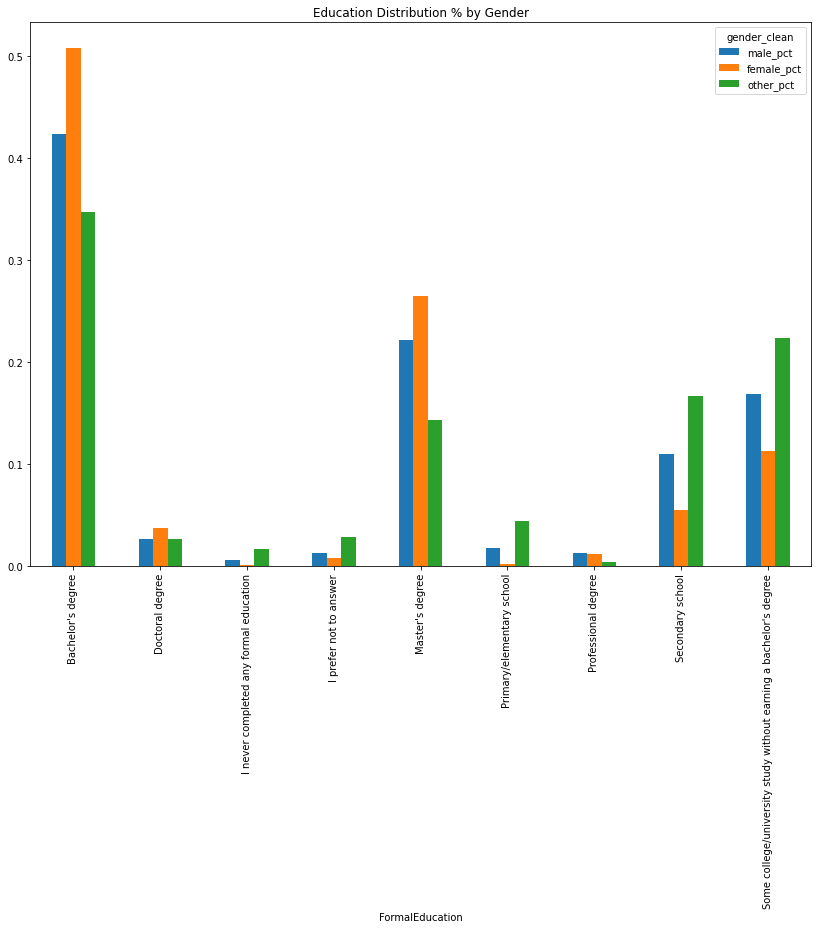

In [189]:
# Bar plot for Education distribution
ed_vals = gender_education_pivot_df[["male_pct","female_pct","other_pct"]]  

(ed_vals).plot(kind="bar",figsize=(14, 10));
plt.title("Education Distribution % by Gender");

(array([0]),
 [Text(0, 0, "Some college/university study without earning a bachelor's degree")])

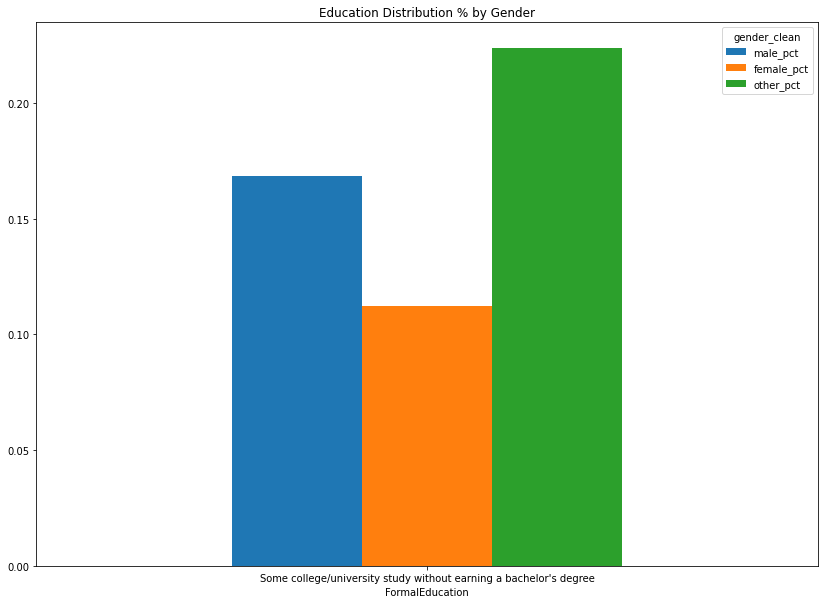

In [224]:
# Bar plot for Education distribution % by gender
ed_vals = gender_education_pivot_df[gender_education_pivot_df.index=="Some college/university study without earning a bachelor's degree"][["male_pct","female_pct","other_pct"]]  
(ed_vals).plot(kind="bar",figsize=(14, 10));
plt.title("Education Distribution % by Gender");
plt.xticks(rotation=0)


### Takeouts

90% of the professionals in the survey are men. While women is on the seocnd largest group and Other genders are barely a minority in the field.

More women in tech have Bachelor degrees

Other genres and Male tends to drop colleague more than woman 

Other genres in tech have less formal higher education than Male and feamle. (Secodnary school,  Some college/university study without earning a bachelor's degree)

## 2 How average salary compares for Man and Woman based on formal education?

In [225]:
# First check for nulls for main variables (Already dropped Gender)
print(f'{df["Gender"].isnull().mean()} of the dataframe for Gender is null')

print(f'{df["Salary"].isnull().mean()} of the dataframe for Salary is null')

print(f'{(df["Salary"].isnull() | df["Gender"].isnull()).mean()} of the dataframe for Salary and Gender is null')

0.0 of the dataframe for Gender is null
0.6659057836619396 of the dataframe for Salary is null
0.6659057836619396 of the dataframe for Salary and Gender is null


In [192]:
#Drop null values
df_salary = df.dropna(subset=["Salary"],axis=0)

#Create new simplier variables for gender and high education from categorical variables.
df_salary['gender_clean'] = df_salary["Gender"].dropna().apply(gender_split)
df_salary["high_education"] = df_salary["FormalEducation"].apply(higher_ed)

<ipython-input-192-7bddb0860244>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['gender_clean'] = df_salary["Gender"].dropna().apply(gender_split)
<ipython-input-192-7bddb0860244>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary["high_education"] = df_salary["FormalEducation"].apply(higher_ed)


In [193]:
#Visualize average salaries by gender per different Froaml Education usign a pivot table instead

gender_salary_pivot_df = df_salary.pivot_table(index = "FormalEducation",columns = "gender_clean",values= "Salary", aggfunc="mean")
gender_salary_pivot_df.rename(columns={"Male":"male_salary","Female":"female_salary","Other":"other_salary"}, inplace=True)

gender_salary_pivot_df['Diff_salary_male_female'] = gender_salary_pivot_df['male_salary'] - gender_salary_pivot_df['female_salary']
gender_salary_pivot_df['Diff_salary_male_other'] = gender_salary_pivot_df['male_salary'] - gender_salary_pivot_df['other_salary']
gender_salary_pivot_df['Diff_salary_female_other'] = gender_salary_pivot_df['female_salary'] - gender_salary_pivot_df['other_salary']

gender_salary_pivot_df.style.bar(subset=['Diff_salary_male_female'], align='mid', color=['#d65f5f', '#5fba7d'])


gender_clean,female_salary,male_salary,other_salary,Diff_salary_male_female,Diff_salary_male_other,Diff_salary_female_other
FormalEducation,,,,,,
Bachelor's degree,60040.908291,57413.518034,76236.534316,-2627.390256,-18823.016282,-16195.626026
Doctoral degree,90623.768006,76872.602904,116093.750000,-13751.165101,-39221.147096,-25469.981994
I never completed any formal education,nan,43090.588914,36305.049997,nan,6785.538917,nan
I prefer not to answer,13255.786387,37629.362623,22454.569168,24373.576236,15174.793455,-9198.782781
Master's degree,56210.867588,59156.503938,44263.505148,2945.636349,14892.998790,11947.362441
Primary/elementary school,32258.064516,63777.121965,91000.000000,31519.057449,-27222.878035,-58741.935484
Professional degree,45458.307618,40901.083005,61644.672532,-4557.224613,-20743.589527,-16186.364914
Secondary school,41110.162320,41353.206724,28322.916009,243.044403,13030.290715,12787.246312
Some college/university study without earning a bachelor's degree,48116.699754,57262.911063,53501.914116,9146.211309,3760.996947,-5385.214362


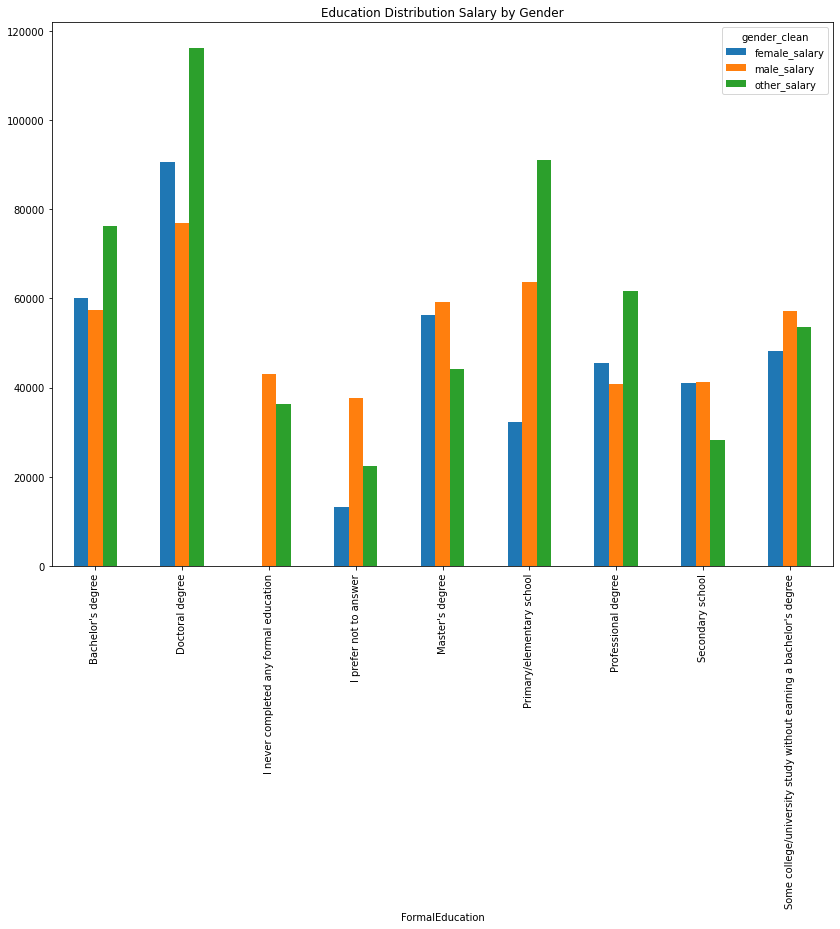

In [194]:

ed_vals = gender_salary_pivot_df[["female_salary","male_salary","other_salary"]]  

(ed_vals).plot(kind="bar",figsize=(14, 10));
plt.title("Education Distribution Salary by Gender");


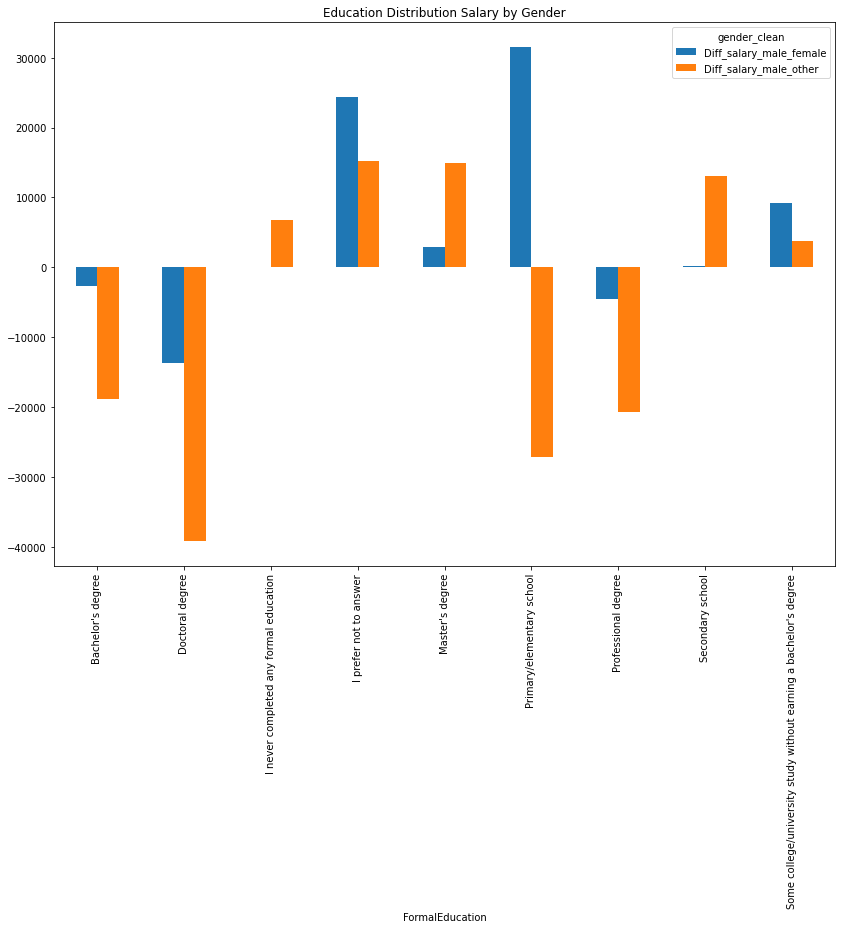

In [195]:
ed_vals = gender_salary_pivot_df[["Diff_salary_male_female","Diff_salary_male_other"]]  

(ed_vals).plot(kind="bar",figsize=(14, 10));
plt.title("Education Distribution Salary by Gender");

### Takeouts:
According to the data, Female professionals might be earning a bit more than Male when they own a Bachelor or Doctoral degree. 

Female and Other genders proven lower salaries when the source of educations is unkwnon comapred to male.

Other genders seems to have higher salaries for most of the formal and non formal education categories. Specially on Primary/elementary School, which is unlikely.

On average Female and Other genres proven higher salaries than Male on formal higher education.

In [196]:
#Let's look at High vs Lower Education values


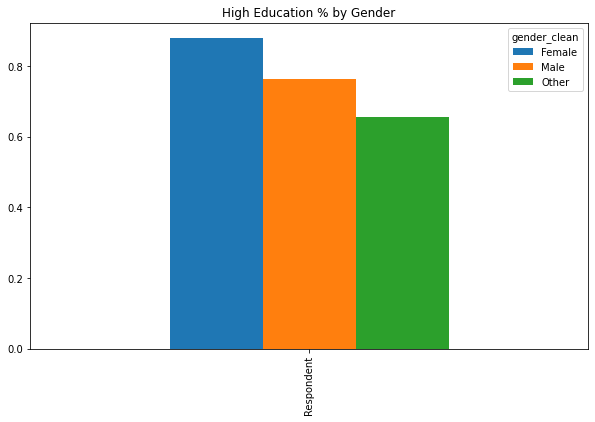

In [197]:
ed_vals = (df_salary[df_salary["high_education"] == 1].groupby(["gender_clean"]).nunique()[["Respondent"]] / df_salary.groupby(["gender_clean"]).nunique()[["Respondent"]]).T  #Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals).plot(kind="bar",figsize=(10, 6));
plt.title("High Education % by Gender");

### Takeouts:
    Female has more formal education than males, 
    Other genres have much less formal education.

<ipython-input-198-f2866fd0b780>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ed_vals = (df_salary[df_salary["high_education"] == 1].groupby(["gender_clean"]).mean()[["Salary"]].T )  #Provide a pandas series of the counts for each FormalEducation status


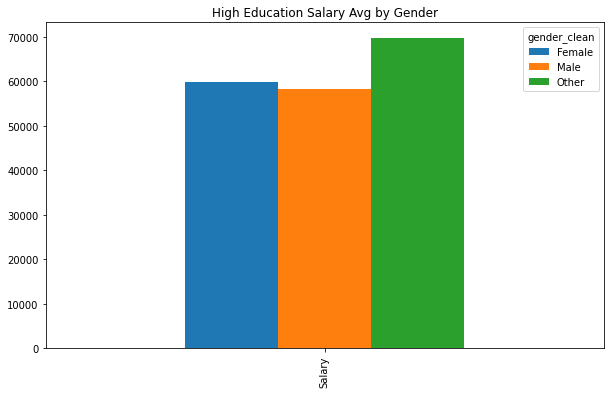

In [198]:
ed_vals = (df_salary[df_salary["high_education"] == 1].groupby(["gender_clean"]).mean()[["Salary"]].T )  #Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals).plot(kind="bar",figsize=(10, 6));
plt.title("High Education Salary Avg by Gender");

<ipython-input-199-2b92e7ba52fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ed_vals = (df_salary[df_salary["high_education"] == 1].groupby(["gender_clean"]).mean()[["HoursPerWeek"]].T )  #Provide a pandas series of the counts for each FormalEducation status


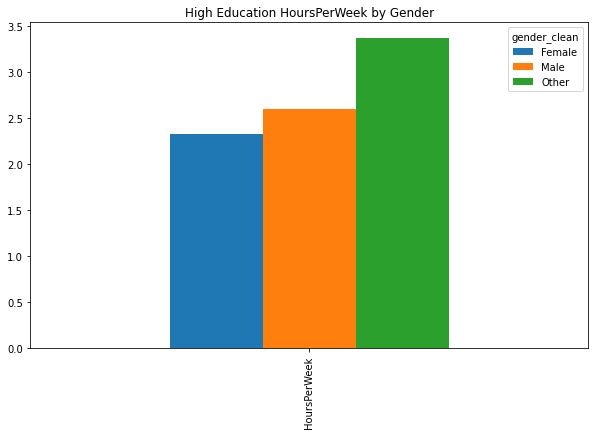

In [199]:
ed_vals = (df_salary[df_salary["high_education"] == 1].groupby(["gender_clean"]).mean()[["HoursPerWeek"]].T )  #Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals).plot(kind="bar",figsize=(10, 6));
plt.title("High Education HoursPerWeek by Gender");

### Takeouts:
    Female and other genres have higher salaries on higher educations than Males and female works less hours per week
    
    

<ipython-input-200-c01daec6a1fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ed_vals = (df_salary[df_salary["high_education"] == 0].groupby(["gender_clean"]).mean()[["Salary"]] ).T  #Provide a pandas series of the counts for each FormalEducation status


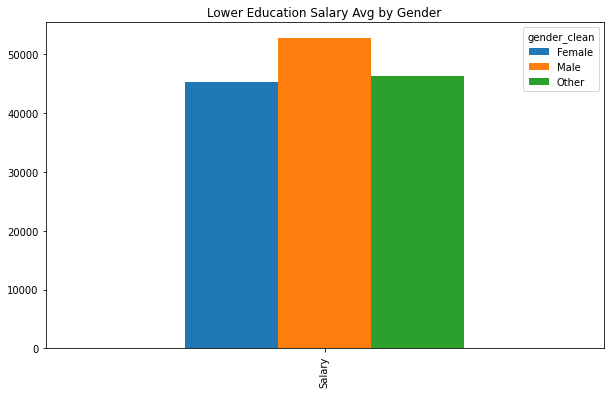

In [200]:
ed_vals = (df_salary[df_salary["high_education"] == 0].groupby(["gender_clean"]).mean()[["Salary"]] ).T  #Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals).plot(kind="bar",figsize=(10, 6));
plt.title("Lower Education Salary Avg by Gender");

<ipython-input-201-cf384d260db4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ed_vals = (df_salary[df_salary["high_education"] == 0].groupby(["gender_clean"]).mean()[["HoursPerWeek"]].T )  #Provide a pandas series of the counts for each FormalEducation status


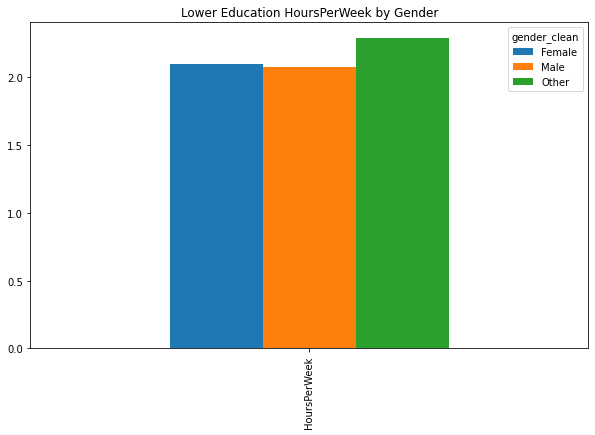

In [201]:
ed_vals = (df_salary[df_salary["high_education"] == 0].groupby(["gender_clean"]).mean()[["HoursPerWeek"]].T )  #Provide a pandas series of the counts for each FormalEducation status

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals).plot(kind="bar",figsize=(10, 6));
plt.title("Lower Education HoursPerWeek by Gender");

### Takeouts:
    Female and other genres have lower salaries on lower educations than males
    while males have higher slaaries without formal education  even though both female, Others aand male works the same hours


## 3 What are the salary ranges according to different professional race backgrounds

In [202]:
#Drop nulls
print(f'% of not null data: {df.dropna(subset=["Salary","Gender","MajorUndergrad"],axis=0).shape[0] / df.shape[0]} %')

df_major = df.dropna(subset=["Salary","Gender","MajorUndergrad"],axis=0)

#Simplify gender column for better understanding
df_major['gender_clean'] = df_major["Gender"].dropna().apply(gender_split)
df_major["high_education"] = df_major["FormalEducation"].apply(higher_ed)

% of not null data: 0.30992666990041945 %


<ipython-input-202-874c18911dbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major['gender_clean'] = df_major["Gender"].dropna().apply(gender_split)
<ipython-input-202-874c18911dbf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_major["high_education"] = df_major["FormalEducation"].apply(higher_ed)


<ipython-input-203-5f4342546fa8>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gen_female.corr(),annot=True, ax=axs[0])
<ipython-input-203-5f4342546fa8>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gen_male.corr(),annot=True, ax=axs[1])
<ipython-input-203-5f4342546fa8>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gen_other.corr(),annot=True, ax=axs[2])


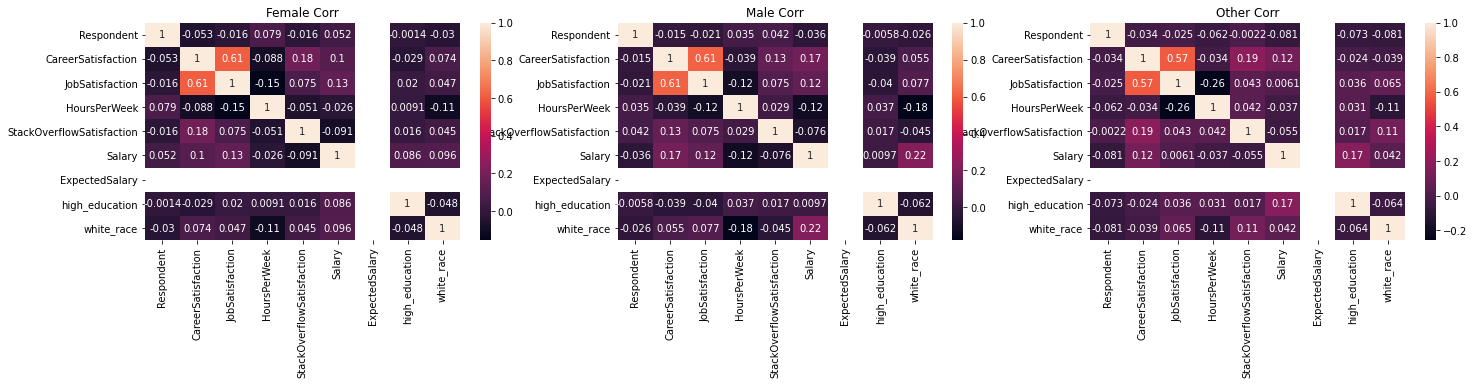

In [203]:
#Let's explore High Education and Salary correlation

#split genders in different DFs
gen_male = df_major[df_major["gender_clean"] == "Male"]
gen_female = df_major[df_major["gender_clean"] == "Female"]
gen_other = df_major[df_major["gender_clean"] == "Other"]

fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(24)
sns.heatmap(gen_female.corr(),annot=True, ax=axs[0])
sns.heatmap(gen_male.corr(),annot=True, ax=axs[1])
sns.heatmap(gen_other.corr(),annot=True, ax=axs[2])

axs[0].title.set_text('Female Corr')
axs[1].title.set_text('Male Corr')
axs[2].title.set_text('Other Corr')

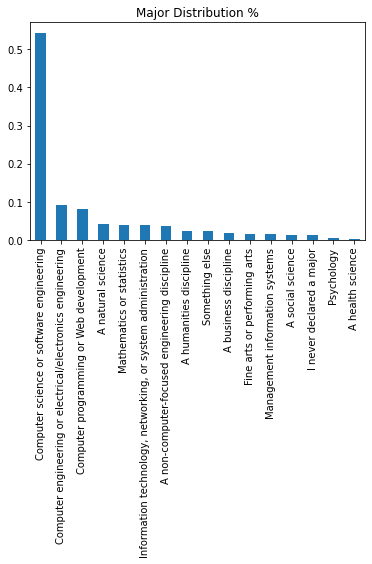

In [204]:
# Check for most common Majors

ed_vals = df_major["MajorUndergrad"].value_counts()

(ed_vals /  df_major.shape[0]).plot(kind="bar");
plt.title("Major Distribution %");

In [205]:
# Major % distirbution per gender

gender_major_pivot_df = df_major.pivot_table(index = "MajorUndergrad",columns = "gender_clean",values= "Respondent", aggfunc="count")
gender_major_pivot_df.rename(columns={"Male":"male_pct","Female":"female_pct","Other":"other_pct"}, inplace=True)

gender_major_pivot_df = gender_major_pivot_df / df_major.groupby("gender_clean").count()[["Respondent"]].T.values.tolist()[0]

gender_major_pivot_df['Diff_pct_male_female'] = gender_major_pivot_df['male_pct'] - gender_major_pivot_df['female_pct']
gender_major_pivot_df['Diff_pct_male_other'] = gender_major_pivot_df['male_pct'] - gender_major_pivot_df['other_pct']
gender_major_pivot_df['Diff_pct_female_other'] = gender_major_pivot_df['female_pct'] - gender_major_pivot_df['other_pct']

gender_major_pivot_df.style.bar(subset=['Diff_pct_male_female'], align='mid', color=['#d65f5f', '#5fba7d'])

gender_clean,female_pct,male_pct,other_pct,Diff_pct_male_female,Diff_pct_male_other,Diff_pct_female_other
MajorUndergrad,,,,,,
A business discipline,0.021492,0.019135,0.005155,-0.002356,0.013981,0.016337
A health science,0.002528,0.001924,nan,-0.000605,nan,nan
A humanities discipline,0.051833,0.020553,0.036082,-0.031280,-0.015530,0.015751
A natural science,0.078382,0.039081,0.046392,-0.039301,-0.007311,0.031990
A non-computer-focused engineering discipline,0.026549,0.036752,0.036082,0.010203,0.000670,-0.009534
A social science,0.035398,0.011542,0.046392,-0.023856,-0.034850,-0.010994
Computer engineering or electrical/electronics engineering,0.064475,0.094361,0.025773,0.029885,0.068587,0.038702
Computer programming or Web development,0.080910,0.079579,0.113402,-0.001331,-0.033823,-0.032492
Computer science or software engineering,0.466498,0.549560,0.520619,0.083061,0.028941,-0.054120


In [206]:
# Major Salary distirbution per gender

gender_major_salary_pivot_df = df_major.pivot_table(index = "MajorUndergrad",columns = "gender_clean",values= "Salary", aggfunc="mean")
gender_major_salary_pivot_df.rename(columns={"Male":"male_salary","Female":"female_salary","Other":"other_salary"}, inplace=True)


gender_major_salary_pivot_df['Diff_salary_male_female'] = gender_major_salary_pivot_df['male_salary'] - gender_major_salary_pivot_df['female_salary']
gender_major_salary_pivot_df['Diff_salary_male_other'] = gender_major_salary_pivot_df['male_salary'] - gender_major_salary_pivot_df['other_salary']
gender_major_salary_pivot_df['Diff_salary_female_other'] = gender_major_salary_pivot_df['female_salary'] - gender_major_salary_pivot_df['other_salary']
gender_major_salary_pivot_df.style.bar(subset=['Diff_salary_male_female'], align='mid', color=['#d65f5f', '#5fba7d'])


gender_clean,female_salary,male_salary,other_salary,Diff_salary_male_female,Diff_salary_male_other,Diff_salary_female_other
MajorUndergrad,,,,,,
A business discipline,66640.720698,68202.200793,27500.000000,1561.480095,40702.200793,39140.720698
A health science,50034.500000,53739.190691,nan,3704.690691,nan,nan
A humanities discipline,66200.457284,70428.069191,70909.527301,4227.611907,-481.458110,-4709.070017
A natural science,67759.234001,65646.120309,62745.585415,-2113.113691,2900.534894,5013.648586
A non-computer-focused engineering discipline,67773.690077,63427.814720,53722.745688,-4345.875358,9705.069032,14050.944390
A social science,68194.525547,71944.977094,82647.849462,3750.451546,-10702.872369,-14453.323915
Computer engineering or electrical/electronics engineering,64724.996266,55442.847270,43901.745493,-9282.148995,11541.101778,20823.250773
Computer programming or Web development,38241.113043,42319.966941,50494.457072,4078.853898,-8174.490131,-12253.344029
Computer science or software engineering,56845.240519,57876.081010,66929.583286,1030.840492,-9053.502276,-10084.342768


(0.0, 0.3)

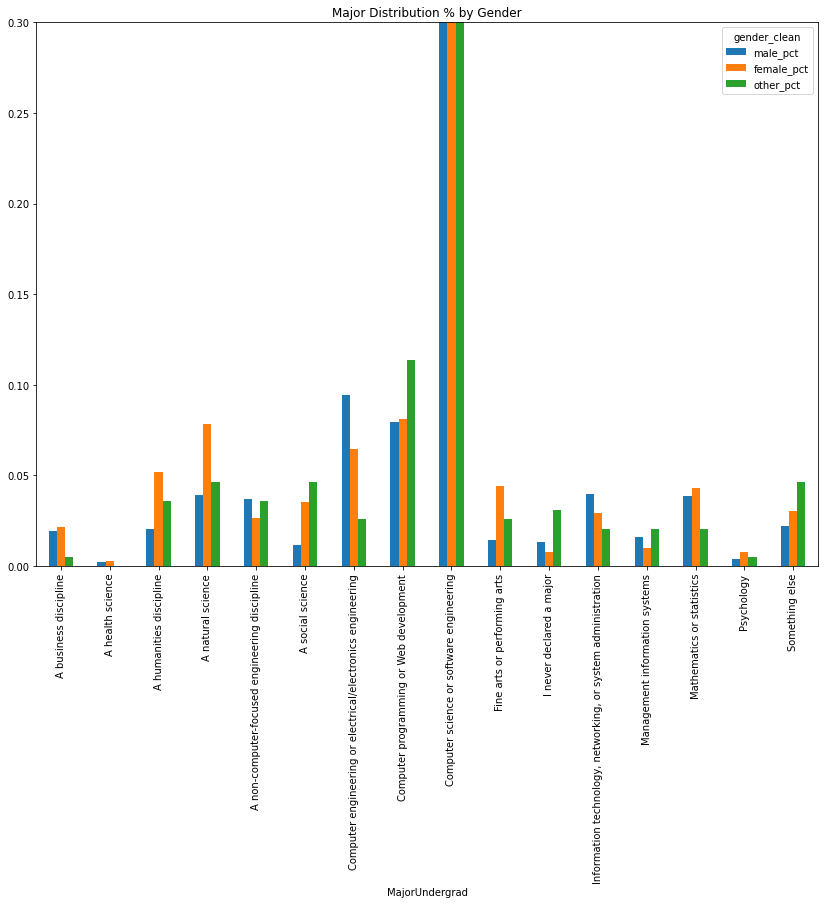

In [223]:
ed_vals = gender_major_pivot_df[["male_pct","female_pct","other_pct"]]  

(ed_vals).plot(kind="bar",figsize=(14, 10));
plt.title("Major Distribution % by Gender");
plt.ylim((0,0.3))


(0.0, 100000.0)

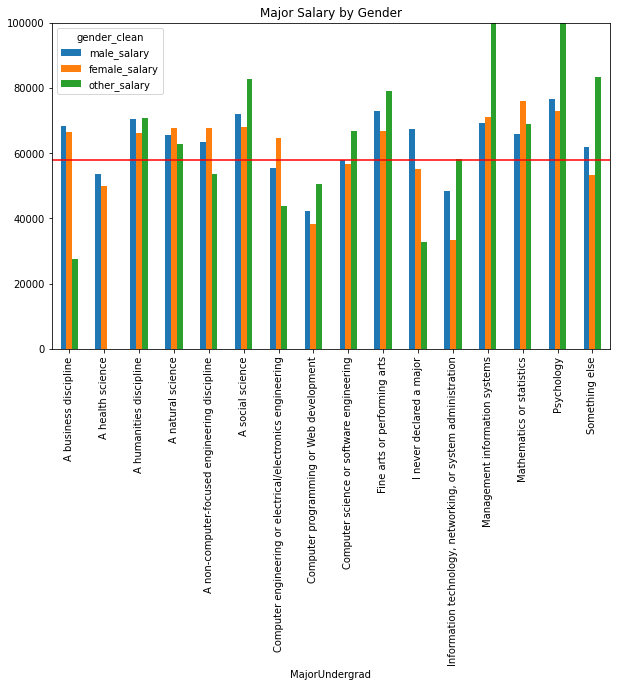

In [208]:
ed_vals = gender_major_salary_pivot_df[["male_salary","female_salary","other_salary"]]  

(ed_vals).plot(kind="bar",figsize=(10, 6));
plt.title("Major Salary by Gender");
plt.axhline(y = df_major[df_major["MajorUndergrad"] == "Computer science or software engineering"]["Salary"].mean(), color = 'r', linestyle = '-')
plt.ylim((0,100000))


### Takeouts
     There is a higher correlation bethween formal education and higher slaries for Female and Others than Males.
     Females comes rom diffrent Majors than most male and other genders.
    
     While computer sicnece is the most common formal education is not correlated to higher salary.
     Other education such as social, psycology and humanities dissiplines abckground professional proven higher salaries on average.

# Modeling (Ignore)

In [209]:
#Thats being sais seems we can predict salaries based on Gender, Race and Education

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [211]:
#Use the function to create X and y
X, y = prepare_x_y(df,"Salary")

/Users/brunopizzani/Documents/bpizzani/Personal/ds_nanodegree/utils.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race_clean'] = df["Race"].apply(race_split)
/Users/brunopizzani/Documents/bpizzani/Personal/ds_nanodegree/utils.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_clean'] = df["Gender"].apply(gender_split)
/Users/brunopizzani/Documents/bpizzani/Personal/ds_nanodegree/utils.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.09524970808165856 on 3376 values.'

In [217]:
#Model shows bad performance, these features are not only enought to predict salaries